In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
import os
from tensorflow.keras.preprocessing import image

# Load attribute file
attr_file = r"C:\Users\Hp\Downloads\archive (12)\list_attr_celeba.csv"
df = pd.read_csv(attr_file)

# Convert labels (-1 to 1) into binary (0 and 1)
df.replace(-1, 0, inplace=True)

# Select required attributes
attributes = ['Smiling', 'Male', 'Wearing_Hat']
df = df[['image_id'] + attributes]

# Split dataset into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# Define image directory (adjust path as needed)
image_dir = r'C:\Users\Hp\Downloads\archive (12)\img_align_celeba' # Change this to actual image directory

# Image data generators for augmentation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_datagen = ImageDataGenerator(rescale=1./255)

# Load images and labels
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=image_dir,
    x_col='image_id',
    y_col=attributes,
    target_size=(128, 128),
    batch_size=32,
    class_mode='raw'
)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    directory=image_dir,
    x_col='image_id',
    y_col=attributes,
    target_size=(128, 128),
    batch_size=32,
    class_mode='raw'
)

# Build CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='sigmoid')  # 3 attributes, sigmoid for multi-label classification
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

# Save the model
model.save('celeba_attributes_model.h5')

print("Model training complete!")


Found 162079 validated image filenames.
Found 40520 validated image filenames.


C:\Users\Hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Hp\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
5065/5065 ━━━━━━━━━━━━━━━━━━━━ 3866s 763ms/step - accuracy: 0.7608 - loss: 0.2135 - val_accuracy: 0.7747 - val_loss: 0.1141
Epoch 2/10
5065/5065 ━━━━━━━━━━━━━━━━━━━━ 169881s 34s/step - accuracy: 0.7888 - loss: 0.1179 - val_accuracy: 0.7808 - val_loss: 0.1021
Epoch 3/10
5065/5065 ━━━━━━━━━━━━━━━━━━━━ 4080s 805ms/step - accuracy: 0.7921 - loss: 0.1048 - val_accuracy: 0.8174 - val_loss: 0.1032
Epoch 4/10
5065/5065 ━━━━━━━━━━━━━━━━━━━━ 3864s 763ms/step - accuracy: 0.7931 - loss: 0.0966 - val_accuracy: 0.7981 - val_loss: 0.0998
Epoch 5/10
5065/5065 ━━━━━━━━━━━━━━━━━━━━ 3835s 757ms/step - accuracy: 0.7956 - loss: 0.0899 - val_accuracy: 0.7926 - val_loss: 0.1071
Epoch 6/10
5065/5065 ━━━━━━━━━━━━━━━━━━━━ 3875s 765ms/step - accuracy: 0.7936 - loss: 0.0849 - val_accuracy: 0.7868 - val_loss: 0.1067
Epoch 7/10
5065/5065 ━━━━━━━━━━━━━━━━━━━━ 3865s 763ms/step - accuracy: 0.7990 - loss: 0.0802 - val_accuracy: 0.8199 - val_loss: 0.1151
Epoch 8/10
5065/5065 ━━━━━━━━━━━━━━━━━━━━ 3828s 756ms/s

Model training complete!


In [3]:
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Loss: {val_loss:.4f}")


1267/1267 ━━━━━━━━━━━━━━━━━━━━ 714s 563ms/step - accuracy: 0.8164 - loss: 0.1129
Validation Accuracy: 0.8173
Validation Loss: 0.1149


In [8]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


NameError: name 'test_generator' is not defined

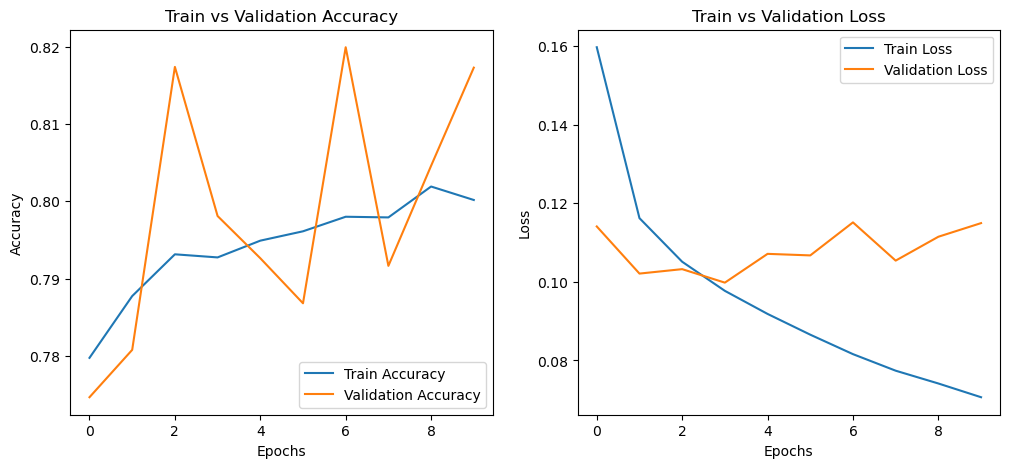

In [4]:
import matplotlib.pyplot as plt

# Extract loss and accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train vs Validation Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Train vs Validation Loss')

plt.show()


In [5]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load a sample image
img_path = r"C:\Users\Hp\Downloads\archive (12)\img_align_celeba\000001.jpg"  # Change the image path
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

# Predict attributes
predictions = model.predict(img_array)
attributes = ['Smiling', 'Male', 'Wearing_Hat']
for attr, pred in zip(attributes, predictions[0]):
    print(f"{attr}: {'Yes' if pred > 0.5 else 'No'} ({pred:.4f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
Smiling: Yes (0.9957)
Male: No (0.0000)
Wearing_Hat: No (0.0000)


In [6]:
from sklearn.metrics import classification_report
import numpy as np

# Get true labels and predictions
y_true = val_df[attributes].values  # True labels
y_pred = model.predict(val_generator)  # Model predictions
y_pred = (y_pred > 0.5).astype(int)  # Convert to 0 or 1

# Classification report
print(classification_report(y_true, y_pred, target_names=attributes))


1267/1267 ━━━━━━━━━━━━━━━━━━━━ 443s 349ms/step
              precision    recall  f1-score   support

     Smiling       0.48      0.49      0.49     19568
        Male       0.41      0.41      0.41     16843
 Wearing_Hat       0.04      0.04      0.04      1996

   micro avg       0.43      0.43      0.43     38407
   macro avg       0.31      0.31      0.31     38407
weighted avg       0.43      0.43      0.43     38407
 samples avg       0.33      0.32      0.31     38407



C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


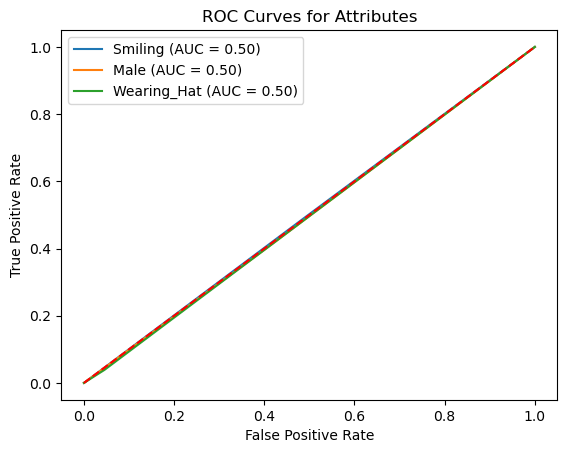

In [7]:
from sklearn.metrics import roc_curve, auc

for i, attr in enumerate(attributes):
    fpr, tpr, _ = roc_curve(y_true[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{attr} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'r--')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curves for Attributes")
plt.show()
